# JFruit2 Sensitivity Analysis

This tutorial will cover the use of the Sobol sensitivity analysis method on the JFruit2 simulation model.

# Google Colab setup (optional)

When running this notebook in Google Colab, execute the following first (also ensure that you restart the Google Colab session after the setup):

In [1]:
! pip install poetry
! poetry config virtualenvs.create false
! poetry self update 1.8.5
! rm -f pyproject.toml
! wget https://raw.githubusercontent.com/Plant-Food-Research-Open/calisim-examples-workshop-material/refs/heads/main/pyproject.toml
! poetry install --no-root
! rm -rf calisim-examples-workshop-material
! git clone --depth 1 https://github.com/Plant-Food-Research-Open/calisim-examples-workshop-material.git
! mv calisim-examples-workshop-material/workshop/jfruit2/* .

  Using cached poetry_core-2.1.1-py3-none-any.whl (331 kB)
  Attempting uninstall: poetry-core
    Found existing installation: poetry-core 1.9.1
    Uninstalling poetry-core-1.9.1:
      Successfully uninstalled poetry-core-1.9.1



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Updating Poetry version ...


Updating dependencies
Resolving dependencies...

Package operations: 2 installs, 24 updates, 0 removals

  - Updating certifi (2025.1.31 -> 2025.8.3)
  - Updating charset-normalizer (3.4.1 -> 3.4.3)
  - Updating more-itertools (10.6.0 -> 10.8.0)
  - Updating urllib3 (2.3.0 -> 2.5.0)
  - Updating zipp (3.21.0 -> 3.23.0)

  CalledProcessError

  Command '['c:\\Users\\hrajvz\\AppData\\Local\\Programs\\Python\\Python310\\python.exe', '-m', 'pip', 'uninstall', 'charset-normalizer', '-y']' returned non-zero exit status 2.

  at c:\Users\hrajvz\AppData\Local\Programs\Python\Python310\lib\subprocess.py:524 in run
       520│             # We don't call process.wait() as .__exit__ does that for us.
       521│             raise
       522│         retcode = process.poll()
       523│         if check and retcode:
    →  524│             raise CalledProcessError(retcode, process.args,
       525│                                      output=stdout, stderr=stderr)
   

'rm' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


Installing dependencies from lock file

Package operations: 220 installs, 50 updates, 0 removals

  - Installing attrs (25.3.0)
  - Installing rpds-py (0.24.0)
  - Updating typing-extensions (4.12.2 -> 4.13.1)
  - Installing asttokens (3.0.0)
  - Installing executing (2.2.0)
  - Installing parso (0.8.4)
  - Installing pure-eval (0.2.3)
  - Installing referencing (0.36.2)
  - Installing six (1.17.0)
  - Installing traitlets (5.14.3)
  - Installing wcwidth (0.2.13)
  - Installing colorama (0.4.6)
  - Installing decorator (5.2.1)
  - Updating exceptiongroup (1.1.0 -> 1.2.2)
  - Installing jedi (0.19.2)
  - Installing jsonschema-specifications (2024.10.1)
  - Installing matplotlib-inline (0.1.7)
  - Installing pygments (2.19.1)
  - Installing python-dateutil (2.9.0.post0)
  - Installing pywin32 (310)
  - Installing stack-data (0.6.3)
  - Installing comm (0.2.2)
  - Installing fastjsonschema (2.21.1)
  - Installing ipython (8.35.0)
  - Installing jsonschema (4.23.0)
  - Installing jupyter-c

Skipping virtualenv creation, as specified in config file.
Installing c:\Users\hrajvz\AppData\Local\Programs\Python\Python310\Scripts\f2py.exe over existing file
Installing c:\Users\hrajvz\AppData\Local\Programs\Python\Python310\Lib\site-packages\numpy\conftest.py over existing file
Installing c:\Users\hrajvz\AppData\Local\Programs\Python\Python310\Lib\site-packages\numpy\ctypeslib.py over existing file
Installing c:\Users\hrajvz\AppData\Local\Programs\Python\Python310\Lib\site-packages\numpy\ctypeslib.pyi over existing file
Installing c:\Users\hrajvz\AppData\Local\Programs\Python\Python310\Lib\site-packages\numpy\matlib.py over existing file
Installing c:\Users\hrajvz\AppData\Local\Programs\Python\Python310\Lib\site-packages\numpy\py.typed over existing file
Installing c:\Users\hrajvz\AppData\Local\Programs\Python\Python310\Lib\site-packages\numpy\version.py over existing file
Installing c:\Users\hrajvz\AppData\Local\Programs\Python\Python310\Lib\site-packages\numpy\_distributor_init.

# Imports

We will first import all required dependencies.

In [2]:
import pandas as pd
import numpy as np
from jfruit2 import JFruit2
import os.path as osp

from calisim.data_model import (
	DistributionModel,
	ParameterDataType,
	ParameterSpecification,
)
from calisim.sensitivity import (
	SensitivityAnalysisMethod,
	SensitivityAnalysisMethodModel,
)
from calisim.statistics import MeanSquaredError

ImportError: DLL load failed while importing _iterative: The specified module could not be found.

# Observed data

We will next load the observed field data.

In [2]:
observed_data = JFruit2.get_observed_data()
observed_data

,age_d,age_h,pip,piv,pp,pv,sfstone,af,ctcs,pif,...,w,s,pf1,pf2,pf,v,dD,mSol,mSta,mSyn
0,2,1,13.778,13.778,9.8344,9.8344,0.0,0.57664,0.000267,11.961,...,0.033638,0.010665,0.98543,4.7757,0.98543,0.040303,-0.37917,0.000646,0.000103,0.004049
1,2,2,13.774,13.774,9.8308,9.8308,0.0,0.58355,0.000264,11.876,...,0.034391,0.010694,0.98872,5.1422,0.98872,0.041074,-0.74167,0.000654,0.000103,0.004054
2,2,3,13.774,13.774,9.8304,9.8304,0.0,0.59076,0.000261,11.804,...,0.035182,0.010724,0.98789,5.0852,0.98789,0.041885,-1.08540,0.000661,0.000103,0.004059
3,2,4,13.771,13.771,9.8273,9.8273,0.0,0.59815,0.000258,11.716,...,0.036000,0.010754,0.98967,5.3017,0.98967,0.042721,-1.41250,0.000668,0.000103,0.004064
4,2,5,13.767,13.767,9.8238,9.8238,0.0,0.60613,0.000254,11.619,...,0.036889,0.010784,0.99307,5.6945,0.99307,0.043629,-1.70830,0.000676,0.000103,0.004070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787,159,20,13.827,13.827,9.8834,9.8834,0.0,194.40000,0.000611,20.593,...,190.860000,39.733000,0.94875,10.3730,0.94875,215.700000,-3046.20000,8.391700,1.092500,7.243600
3788,159,21,13.821,13.821,9.8781,9.8781,0.0,194.45000,0.000610,20.527,...,190.940000,39.733000,0.94891,12.5310,0.94891,215.780000,-3047.00000,8.392100,1.092100,7.243600
3789,159,22,13.817,13.817,9.8737,9.8737,0.0,194.50000,0.000610,20.470,...,191.030000,39.733000,0.94898,13.5650,0.94898,215.870000,-3047.80000,8.392600,1.091700,7.243600
3790,159,23,13.814,13.814,9.8711,9.8711,0.0,194.56000,0.000610,20.433,...,191.130000,39.733000,0.94902,14.1340,0.94902,215.970000,-3048.50000,8.393100,1.091300,7.243600


# Calibration procedure

We will next run the calibration procedure. In this case, the Sobol sensitivity analysis.

We begin by specifying our parameter distributions.

In [3]:
parameter_spec = ParameterSpecification(
	parameters=[
		DistributionModel(
			name="Growth.lp",
			distribution_name="uniform",
			distribution_args=[0.002, 0.004],
			data_type=ParameterDataType.CONTINUOUS,
		),
		DistributionModel(
			name="Growth.lxAsy",
			distribution_name="uniform",
			distribution_args=[0.01, 0.015],
			data_type=ParameterDataType.CONTINUOUS,
		),
	]
)

We next run the sensitivity analysis.

 /home/jbris/.cache/pypoetry/virtualenvs/calisim-examples-yfUJKvMn-py3.10/lib/python3.10/site-packages/SALib/util/problem.py:213: UserWarning:Parallel evaluation is an experimental feature and may not work.
 /home/jbris/.cache/pypoetry/virtualenvs/calisim-examples-yfUJKvMn-py3.10/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning:unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.


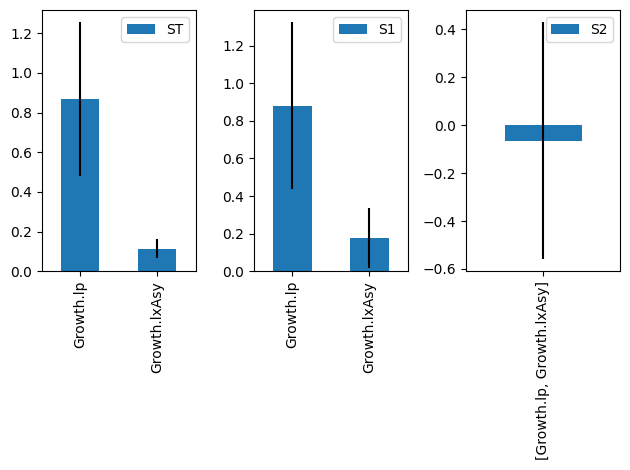

 /home/jbris/.cache/pypoetry/virtualenvs/calisim-examples-yfUJKvMn-py3.10/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning:unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.


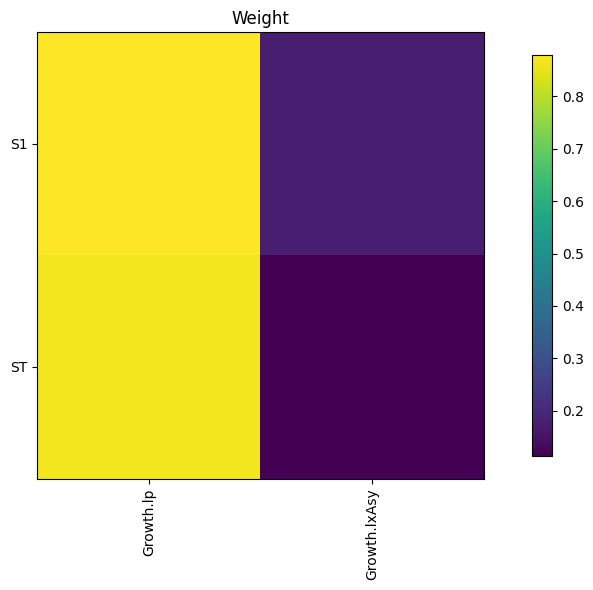

In [4]:
def sensitivity_func(
	parameters: dict, simulation_id: str, observed_data: np.ndarray | None
) -> float | list[float]:
    model = JFruit2()
    props = model.load_properties()
    for k in parameters:
        props[k] = parameters[k]
    model.save_properties(props)

    model.run(
        properties = osp.join("data", "out", f"{model.sim_id}.properties")
    )
    simulated_data = model.results.w.values
    metric = MeanSquaredError()
    discrepancy = metric.calculate(observed_data, simulated_data)
    return discrepancy

specification = SensitivityAnalysisMethodModel(
	experiment_name="salib_sensitivity_analysis",
	parameter_spec=parameter_spec,
	observed_data=observed_data.w.values,
	method="sobol",
	n_samples=32,
    n_jobs=8,
	output_labels=["Weight"],
	verbose=True,
	batched=False,
	method_kwargs=dict(calc_second_order=True, scramble=True),
	analyze_kwargs=dict(
		calc_second_order=True,
		num_resamples=200,
		conf_level=0.95,
	),
)

calibrator = SensitivityAnalysisMethod(
	calibration_func=sensitivity_func, specification=specification, engine="salib"
)

calibrator.specify().execute().analyze()

The three charts are total order sensitivity (ST), first order index (S1) and second order index (S2).

The first order sensitivity index for a parameter represents the fraction of the variance in the target variable caused by the variation in the input parameter. Total order indices represent the total variance in the target variable for a given parameter, including all variance caused by its interactions, of any order, with any other input variable.

In many models there are statistical dependencies between parameters or physical constraints on the model. In such cases part of the variance in the output is also caused by interactions between variables which is not represented by the first order indices. In such cases, second order indices need to be calculated. If the total-order indices are substantially larger than the first-order indices, then it is likely that there are higher-order interactions occurring. It means that if both parameters are changed at the same time, it will have a large effect on the target variable.first order index (S1) and 

# Results

In [ ]:
print("JFruit2 sensitivity analysis")
print("=" * 60)

# Get results from the calibrator
sp = calibrator.implementation.sp
Y = sp._results
Si = sobol.analyze(sp, Y, calc_second_order=True)

output_labels = calibrator.specification.output_labels[0]  

s1_values = Si['S1']
st_values = Si['ST']
parameter_names = sp['names']

# results summary
sensitivity_df = pd.DataFrame({
    'Parameter': parameter_names,
    'S1 (direct effect)': s1_values,
    'ST (total effect)': st_values,
    'Interactions': st_values - s1_values
}).sort_values('ST (total effect)', ascending=False)

print(sensitivity_df.to_string(index=False, float_format='%.3f'))

print("=" * 60)
for _, row in sensitivity_df.iterrows():
    param = row['Parameter']
    s1 = row['S1 (direct effect)']
    st = row['ST (total effect)']
    
    print(f"\n• {param}: {st:.1%} total influence on {output_labels}")
    
    if 'Growth.lp' in param:
        print(f"  - Controls how quickly the fruit grows")
    elif 'Growth.lxAsy' in param:
        print(f"  - Sets the maximum potential fruit size")
    
    if st > 0.1:
        print(f"  - 🔴 HIGH importance - prioritize for calibration")
    elif st > 0.05:
        print(f"  - 🟡 MEDIUM importance - secondary calibration target")
    else:
        print(f"  - 🟢 LOW importance - can use literature values")


print("=" * 60)
most_important = sensitivity_df.iloc[0]
max_interaction = sensitivity_df['Interactions'].max()

print(f"• Most important parameter: {most_important['Parameter']} ({most_important['ST (total effect)']:.1%} influence)")
print(f"• Parameter interactions: {'Strong' if max_interaction > 0.1 else 'Weak'}")

if max_interaction > 0.1:
    print(f"  → Calibrate parameters together, not separately")
else:
    print(f"  → Parameters can be calibrated independently")

total_explained = np.sum(st_values)
print(f"• Model variance explained: {total_explained:.1%}")
if total_explained > 0.8:
    print(f"  → The parameters explain most model behaviours in the response variables")
else:
    print(f"  → The model outputs are not sensitive to the parameter set selected")